In [1]:
import langgraph

In [2]:
# Configuración inicial
import os
from dotenv import load_dotenv

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Verificar si la clave API de Groq está presente
if 'GROQ_API_KEY' not in os.environ:
    raise ValueError("La clave API de Groq no está configurada en el archivo .env")

In [3]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.schema import HumanMessage, AIMessage, SystemMessage, FunctionMessage

In [16]:
#primero defino el LLM

llm= ChatGroq(temperature=0, model_name="llama3-70b-8192")

In [5]:
#defino que mi state va a ser unicamente una lista de mensajes

class State(TypedDict):
    messages: Annotated[list, add_messages]

In [62]:
system_prompt_template = """Eres un asistente de la nueva obra social llamada OSPE, tu trabajo es derivar a los pacientes que escriban por el chatbot consultando por turnos medicos, asistencia o por alguna consulta basica de medicina (por ejemplo que medicamento tomar si me duele la garganta). 
Deberias poder identificar que le sucede al paciente consultandole sus sintomas si es que los tiene y luego recomendarle un turno con la especialidad detectada.
"""

In [63]:
def chatbot(state: State):
    system_prompt = system_prompt_template
    
    messages = [SystemMessage(content=system_prompt)] + state["messages"]
    response = llm.invoke(messages)
    return {"messages": [response]}

In [8]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

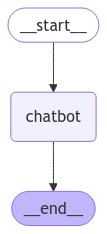

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
def add_message(message_content: str, is_human: bool, previous_state: State = None) -> State:
    if previous_state is None:
        previous_state = {"messages": []}
    new_message = HumanMessage(content=message_content) if is_human else AIMessage(content=message_content)
    return {
        "messages": previous_state["messages"] + [new_message]
    }

In [66]:
result = {'messages': []}

In [76]:
#esta es la celda que tengo que editar para agregarun nuevo mensaje

state = add_message("esoy von estos sintomas hace una semana, es tos seca y me duele la garganta. mi temperatura de fiebre es de 38 grados", is_human=True, previous_state=result)

In [77]:

state

{'messages': [HumanMessage(content='Hola', id='3c18eb29-a936-41a2-b912-6cf741b2ad1f'),
  AIMessage(content='Hola! Bienvenido a OSPE, la obra social que te brinda atención médica de calidad. ¿En qué puedo ayudarte hoy? ¿Necesitas un turno médico, tienes alguna consulta o síntoma que te preocupa?', response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 118, 'total_tokens': 172, 'completion_time': 0.169587042, 'prompt_time': 0.007611643, 'queue_time': -0.0013178530000000008, 'total_time': 0.177198685}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'stop', 'logprobs': None}, id='run-a221f700-8ffc-441f-a33a-23e2ba32d715-0', usage_metadata={'input_tokens': 118, 'output_tokens': 54, 'total_tokens': 172}),
  HumanMessage(content='Necesito un turno medico', id='141afcf3-ad10-413d-a734-eb7b97952470'),
  AIMessage(content='¡Claro! Para poder derivarte a un turno médico adecuado, necesito saber un poco más sobre tu situación. ¿Cuál e

In [78]:
#esta es la celda que corre e graph

result = graph.invoke(state)
result

{'messages': [HumanMessage(content='Hola', id='3c18eb29-a936-41a2-b912-6cf741b2ad1f'),
  AIMessage(content='Hola! Bienvenido a OSPE, la obra social que te brinda atención médica de calidad. ¿En qué puedo ayudarte hoy? ¿Necesitas un turno médico, tienes alguna consulta o síntoma que te preocupa?', response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 118, 'total_tokens': 172, 'completion_time': 0.169587042, 'prompt_time': 0.007611643, 'queue_time': -0.0013178530000000008, 'total_time': 0.177198685}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'stop', 'logprobs': None}, id='run-a221f700-8ffc-441f-a33a-23e2ba32d715-0', usage_metadata={'input_tokens': 118, 'output_tokens': 54, 'total_tokens': 172}),
  HumanMessage(content='Necesito un turno medico', id='141afcf3-ad10-413d-a734-eb7b97952470'),
  AIMessage(content='¡Claro! Para poder derivarte a un turno médico adecuado, necesito saber un poco más sobre tu situación. ¿Cuál e